<a href="https://colab.research.google.com/github/SolFreire/SingleLayerPerceptronNetworkVertebralColumn/blob/main/SingleLayerPerceptronNetworkVertebralColumnProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import seaborn as sns

In [ ]:
! pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
vertebral_column = fetch_ucirepo(id=212)

# data (as pandas dataframes)
X = vertebral_column.data.features
y = vertebral_column.data.targets

# metadata
print(vertebral_column.metadata)

# variable information
print(vertebral_column.variables)

{'uci_id': 212, 'name': 'Vertebral Column', 'repository_url': 'https://archive.ics.uci.edu/dataset/212/vertebral+column', 'data_url': 'https://archive.ics.uci.edu/static/public/212/data.csv', 'abstract': 'Data set containing values for six biomechanical features used to classify orthopaedic patients into 3 classes (normal, disk hernia or spondilolysthesis) or 2 classes (normal or abnormal).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 310, 'num_features': 6, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2005, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C5K89B', 'creators': ['Guilherme Barreto', 'Ajalmar Neto'], 'intro_paper': None, 'additional_info': {'summary': "Biomedical data set built by Dr. Henrique da Mota during a medical residence period in the Group of Applied R

In [ ]:
print(y.value_counts())

class            
Spondylolisthesis    150
Normal               100
Hernia                60
Name: count, dtype: int64


In [ ]:
type(X)


numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:


le = LabelEncoder()
y = le.fit_transform(y)
print(y)

y_onehot = np.eye(3)[y]
print(y_onehot)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.

In [ ]:
class PerceptronMulticlass:
    def __init__(self, n_features, n_classes, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs
        self.n_classes = n_classes
        self.weights = torch.randn(n_classes, n_features, dtype=torch.float32)
        self.bias = torch.full((n_classes,), -1.0)
        self.errors_per_epoch = []

    def activation(self, x):
        return torch.where(x >= 0, 1.0, 0.0)

    def fit(self, X, y_one_hot):
        X = torch.tensor(X, dtype=torch.float32)
        y_one_hot = torch.tensor(y_one_hot, dtype=torch.float32)

        for epoch in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y_one_hot):
                z = torch.matmul(self.weights, xi) + self.bias
                y_pred = self.activation(z)
                update = self.lr * (target - y_pred)
                if torch.any(update != 0):

                    for j in range(self.n_classes):
                        self.weights[j] += update[j] * xi
                        self.bias[j] += update[j]
                    errors += 1

            self.errors_per_epoch.append(errors)

    def predict(self, X):
        X = torch.tensor(X, dtype=torch.float32)
        z = torch.matmul(self.weights, X.T).T + self.bias
        return torch.argmax(z, dim=1).numpy()

Realização 1: Acurácia = 0.1935
Realização 2: Acurácia = 0.1935
Realização 3: Acurácia = 0.1935
Realização 4: Acurácia = 0.3226
Realização 5: Acurácia = 0.1935
Realização 6: Acurácia = 0.4516
Realização 7: Acurácia = 0.4355
Realização 8: Acurácia = 0.5000
Realização 9: Acurácia = 0.3710
Realização 10: Acurácia = 0.2258
Realização 11: Acurácia = 0.3387
Realização 12: Acurácia = 0.4194
Realização 13: Acurácia = 0.3548
Realização 14: Acurácia = 0.4839
Realização 15: Acurácia = 0.1935
Realização 16: Acurácia = 0.1935
Realização 17: Acurácia = 0.1129
Realização 18: Acurácia = 0.3226
Realização 19: Acurácia = 0.4032
Realização 20: Acurácia = 0.4677

 Resultados gerais:
Acurácia média: 0.3185
Desvio padrão:  0.1184
Melhor realização: 8 (Acurácia = 0.5000)


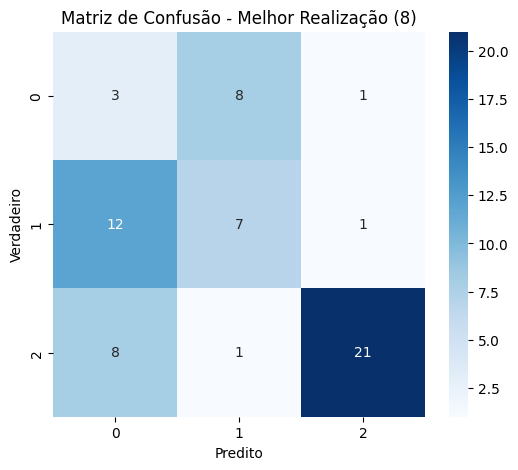

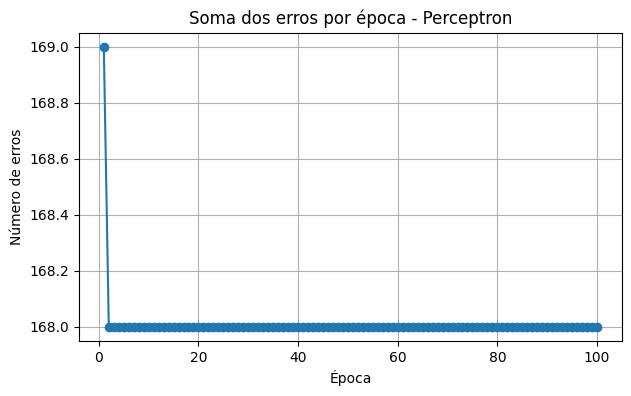

In [ ]:
accuracies = []
conf_matrices = []

for run in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=run)
    model = PerceptronMulticlass( 6, 3, lr=0.01, epochs=100)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    conf_matrices.append(confusion_matrix(y_test, y_pred))

    print(f"Realização {run+1}: Acurácia = {acc:.4f}")

mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
best_run = np.argmax(accuracies)

print("\n Resultados gerais:")
print(f"Acurácia média: {mean_acc:.4f}")
print(f"Desvio padrão:  {std_acc:.4f}")
print(f"Melhor realização: {best_run+1} (Acurácia = {accuracies[best_run]:.4f})")

best_conf = conf_matrices[best_run]

plt.figure(figsize=(6, 5))
sns.heatmap(best_conf, annot=True, fmt="d", cmap="Blues")
plt.title(f"Matriz de Confusão - Melhor Realização ({best_run+1})")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(range(1, len(model.errors_per_epoch)+1), model.errors_per_epoch, marker='o')
plt.title("Soma dos erros por época - Perceptron")
plt.xlabel("Época")
plt.ylabel("Número de erros")
plt.grid(True)
plt.show()
